In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "S&P500_D_1789-05-01_2025-09-17.csv"

# print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [6]:
# Calculate simple returns with pct_change()
df['simple_returns'] = df['close'].pct_change()

# Drop NA values that result from pct_change()
df.dropna(inplace=True)

# Show dataframe
df.head()

,open,high,low,close,volume,simple_returns
date,,,,,,
1789-06-01,0.51,0.51,0.51,0.51,0.0,0.000000
1789-07-01,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-01,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-01,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-01,0.51,0.51,0.51,0.51,0.0,0.000000


In [7]:
# drop 'open', 'high', 'low', 'close', 'volume' columns
df = df.drop(columns=['open', 'high', 'low', 'close', 'volume'])

# rename 'simple_returns' to 'returns'
df.rename(columns={'simple_returns': 'returns'}, inplace=True)

daily_returns = df.copy()

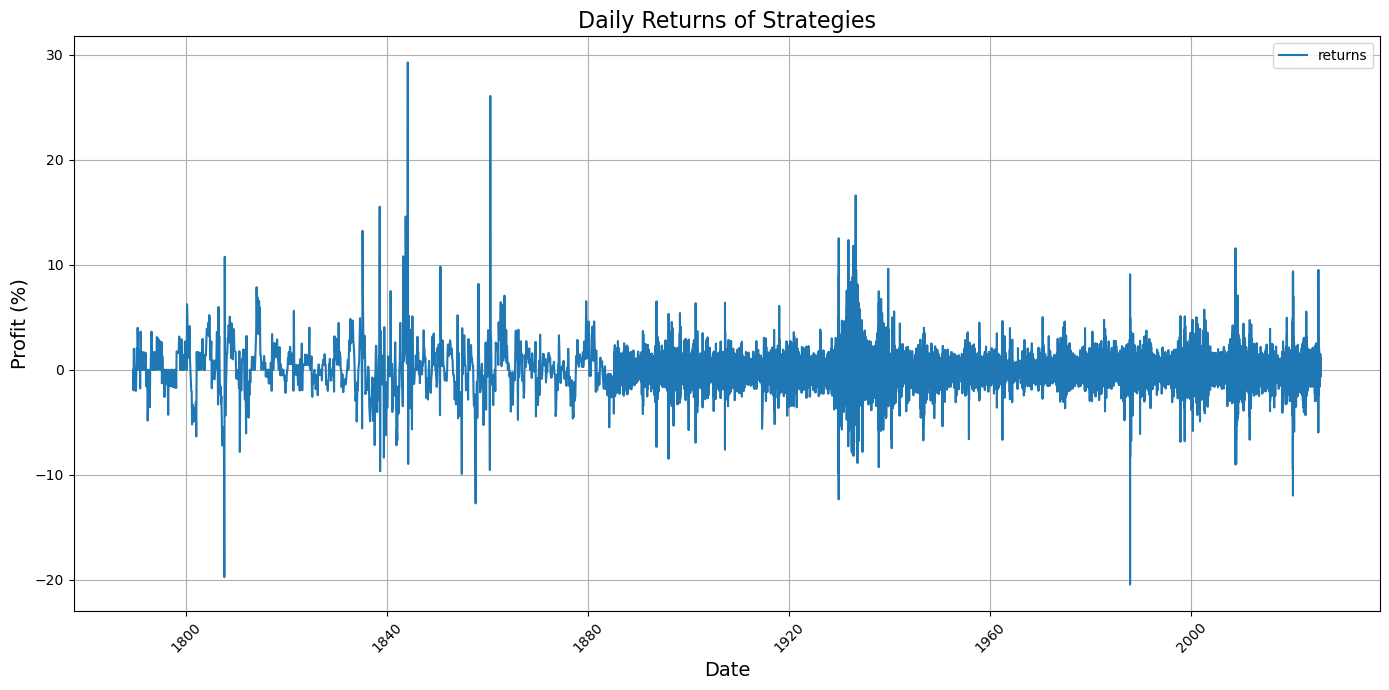

In [8]:
# plot daily_returns
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_returns*100, color='blue', linewidth=1.5)
plt.title('Daily Returns of Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()